In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.kernel_ridge import KernelRidge
import joblib
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
file_name="/content/drive/MyDrive/Colab Notebooks/JaipurRawData3.csv" # Raw Data
climate_data = pd.read_csv(file_name)


# Data Cleaning

In [88]:
# Check duplicate data
if(climate_data.duplicated().any()):
  climate_data[climate_data.duplicated()]
else:
  print("No duplicate is here")

No duplicate is here


In [89]:
climate_data.info() # Check data types and missing values
climate_data.describe() # Summary stats (numerical columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           679 non-null    object 
 1   meantempm      679 non-null    int64  
 2   meandewptm     679 non-null    int64  
 3   meanpressurem  679 non-null    float64
 4   maxhumidity    679 non-null    int64  
 5   minhumidity    679 non-null    int64  
 6   maxtempm       679 non-null    int64  
 7   mintempm       679 non-null    int64  
 8   maxdewptm      679 non-null    int64  
 9   mindewptm      679 non-null    int64  
 10  maxpressurem   679 non-null    int64  
 11  minpressurem   679 non-null    int64  
 12  precipm        679 non-null    float64
dtypes: float64(2), int64(10), object(1)
memory usage: 69.1+ KB


,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,26.092784,11.951399,1009.493417,67.265096,22.742268,32.567010,19.667158,16.147275,7.438881,1012.240059,1005.268041,1.245066
std,6.223843,8.738194,6.472317,22.159195,19.363085,6.010402,6.833975,7.235735,11.694565,6.520884,7.124392,5.424255
min,10.000000,-10.000000,997.630000,15.000000,4.000000,18.000000,3.000000,0.000000,-94.000000,999.000000,992.000000,0.000000
25%,20.000000,5.000000,1003.715000,50.000000,9.000000,28.000000,13.000000,10.000000,0.000000,1006.000000,999.000000,0.000000
50%,28.000000,10.000000,1008.810000,66.000000,15.000000,33.000000,22.000000,15.000000,6.000000,1012.000000,1004.000000,0.000000
75%,30.000000,21.000000,1015.510000,88.000000,33.000000,37.000000,25.000000,23.000000,18.000000,1018.000000,1012.000000,0.000000
max,38.000000,26.000000,1023.430000,100.000000,89.000000,46.000000,32.000000,29.000000,25.000000,1026.000000,1020.000000,57.000000


In [90]:
climate_data.isnull().sum() # Check missing values

,0
date,0
meantempm,0
meandewptm,0
meanpressurem,0
maxhumidity,0
minhumidity,0
maxtempm,0
mintempm,0
maxdewptm,0
mindewptm,0


In [91]:
climate_data.head()

,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm
0,2016-05-01,34,-1,1005.63,24,4,43,26,9,-10,1009,999,0.0
1,2016-05-02,36,4,1005.46,21,6,43,29,10,-2,1008,1001,0.0
2,2016-05-03,35,6,1006.00,27,5,41,29,12,-2,1009,1000,0.0
3,2016-05-04,34,7,1005.65,29,6,41,27,13,0,1008,1001,0.0
4,2016-05-05,31,11,1007.94,61,13,38,24,16,6,1011,1003,5.0


In [92]:
climate_data = climate_data.dropna(how="all") # if drop fully empty data

In [93]:
climate_data.columns = [c.strip().lower().replace(" ", "_") for c in climate_data.columns]
climate_data['date'] = pd.to_datetime(climate_data['date'])
climate_data = climate_data.sort_values('date').drop_duplicates('date')
climate_data.iloc[:,0]


,date
0,2016-05-01
1,2016-05-02
2,2016-05-03
3,2016-05-04
4,2016-05-05
...,...
674,2018-03-07
675,2018-03-08
676,2018-03-09
677,2018-03-10



# Feature engineering
---



In [94]:
if "date" in climate_data.columns:
    climate_data["month"] = climate_data["date"].dt.month
    climate_data["day"] = climate_data["date"].dt.day
    climate_data["dayofyear"] = climate_data["date"].dt.dayofyear
    climate_data["year"] = climate_data["date"].dt.year
climate_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           679 non-null    datetime64[ns]
 1   meantempm      679 non-null    int64         
 2   meandewptm     679 non-null    int64         
 3   meanpressurem  679 non-null    float64       
 4   maxhumidity    679 non-null    int64         
 5   minhumidity    679 non-null    int64         
 6   maxtempm       679 non-null    int64         
 7   mintempm       679 non-null    int64         
 8   maxdewptm      679 non-null    int64         
 9   mindewptm      679 non-null    int64         
 10  maxpressurem   679 non-null    int64         
 11  minpressurem   679 non-null    int64         
 12  precipm        679 non-null    float64       
 13  month          679 non-null    int32         
 14  day            679 non-null    int32         
 15  dayofyear      679 non-

In [95]:
climate_data["meantempm_next"] = climate_data["meantempm"].shift(-1)
climate_data = climate_data.dropna(subset=["meantempm_next"])
climate_data.describe()

,date,meantempm,meandewptm,meanpressurem,maxhumidity,minhumidity,maxtempm,mintempm,maxdewptm,mindewptm,maxpressurem,minpressurem,precipm,month,day,dayofyear,year,meantempm_next
count,678,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,2017-04-04 20:02:07.433628416,26.092920,11.964602,1009.488245,67.296460,22.766962,32.564897,19.669617,16.156342,7.454277,1012.234513,1005.262537,1.246903,6.746313,15.551622,189.945428,2016.740413,26.081121
min,2016-05-01 00:00:00,10.000000,-10.000000,997.630000,15.000000,4.000000,18.000000,3.000000,0.000000,-94.000000,999.000000,992.000000,0.000000,1.000000,1.000000,1.000000,2016.000000,10.000000
25%,2016-10-17 06:00:00,20.000000,5.000000,1003.707500,50.000000,9.000000,28.000000,13.000000,10.000000,0.000000,1006.000000,999.000000,0.000000,4.000000,8.000000,101.250000,2016.000000,20.000000
50%,2017-04-04 12:00:00,28.000000,10.000000,1008.795000,66.000000,15.000000,33.000000,22.000000,15.000000,6.000000,1012.000000,1004.000000,0.000000,7.000000,15.000000,196.000000,2017.000000,28.000000
75%,2017-09-21 18:00:00,30.000000,21.000000,1015.515000,88.000000,33.000000,37.000000,25.000000,23.000000,18.000000,1018.000000,1012.000000,0.000000,10.000000,23.000000,281.000000,2017.000000,30.000000
max,2018-03-10 00:00:00,38.000000,26.000000,1023.430000,100.000000,89.000000,46.000000,32.000000,29.000000,25.000000,1026.000000,1020.000000,57.000000,12.000000,31.000000,366.000000,2018.000000,38.000000
std,NaN,6.228436,8.737866,6.475691,22.160467,19.366678,6.014586,6.838720,7.237216,11.696310,6.524096,7.128206,5.428048,3.478647,8.827386,106.611769,0.629544,6.221008


# For Preparing x and y

In [96]:
features = [
    "meandewptm", "meanpressurem", "maxhumidity", "minhumidity",
    "maxtempm", "mintempm", "maxdewptm", "mindewptm",
    "maxpressurem", "minpressurem", "precipm",
    "month", "day", "dayofyear"
]
X = climate_data[features].values # independent temp
y = climate_data["meantempm_next"].values # target variable

# Split the *data*

In [97]:
test_size = 0.2
split_idx = int(len(X) * (1 - test_size))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
print(len(X_train), len(X_test),  len(y_train), len(y_test))

542 136 542 136


# Scale the data

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kernel PCA

In [99]:

kpca = KernelPCA(n_components=8, kernel="rbf", gamma=0.05, random_state=42)
X_train_k = kpca.fit_transform(X_train_scaled)
X_test_k = kpca.transform(X_test_scaled)

# Linear Regression

In [100]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("\n===== Linear Regression (Baseline) =====")
print("MSE :", mean_squared_error(y_test, y_pred_lr))
print("R²  :", r2_score(y_test, y_pred_lr))


===== Linear Regression (Baseline) =====
MSE : 1.208414723222432
R²  : 0.8958818327802835


Train Kernel model

In [104]:
kr = KernelRidge(kernel="rbf")
param_grid = {"alpha":[0.1, 1, 10], "gamma":[0.001, 0.01, 0.1, 1]}

tscv = TimeSeriesSplit(n_splits=5)
grid_kr = GridSearchCV(kr, param_grid, cv=tscv, scoring="neg_mean_squared_error")
grid_kr.fit(X_train_k, y_train)

best_kr = grid_kr.best_estimator_
y_pred_kr = grid_kr.predict(X_test_k)
print("Best KR params:", grid_kr.best_params_)
print("MSE :", mean_squared_error(y_test, y_pred_kr))
print("R²  :", r2_score(y_test, y_pred_kr))

Best KR params: {'alpha': 0.1, 'gamma': 1}
MSE : 2.1738952529634803
R²  : 0.8126951077998932


Train SVR Model

In [105]:
svr = SVR(kernel="rbf")
param_grid_svr = {"C":[1, 10, 100], "gamma":[0.001, 0.01, 0.1], "epsilon":[0.1, 0.2]}

grid_svr = GridSearchCV(svr, param_grid_svr, cv=tscv, scoring="neg_mean_squared_error", n_jobs=-1)
grid_svr.fit(X_train_k, y_train)
best_svr = grid_svr.best_estimator_
y_pred_svr = grid_svr.predict(X_test_k)
print("Best SVR params:", grid_svr.best_params_)
print("MSE :", mean_squared_error(y_test, y_pred_svr))
print("R²  :", r2_score(y_test, y_pred_svr))

Best SVR params: {'C': 100, 'epsilon': 0.1, 'gamma': 0.1}
MSE : 2.856099667914624
R²  : 0.7539157235463652


Residual Plot

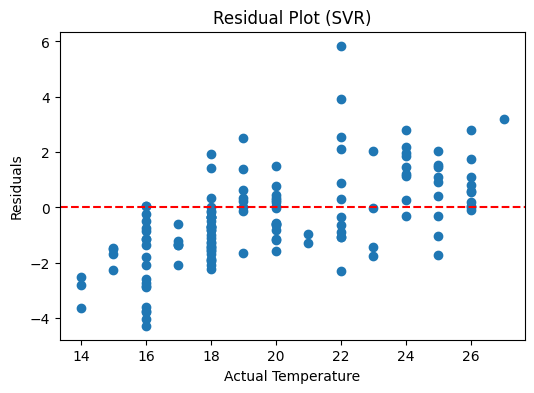

In [109]:
plt.figure(figsize=(6,4))
residuals = y_test - y_pred_svr
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Temperature")
plt.ylabel("Residuals")
plt.title("Residual Plot (SVR)")
plt.show()

Feature Importance (Permutation)

In [110]:
result = permutation_importance(grid_svr.best_estimator_, X_test_k, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

for i, col in enumerate(features):
  if(i<len(importance)):
     print(f"{col}: {importance[i]:.4f}")

meandewptm: -0.0069
meanpressurem: 0.8764
maxhumidity: 0.7105
minhumidity: 0.0666
maxtempm: -0.0040
mintempm: 0.2300
maxdewptm: -0.0005
mindewptm: 0.0077


In [108]:
def evaluate(model, X_t, y_t, name):
    y_pred = model.predict(X_t)
    print(f"\n===== {name} =====")
    mse = mean_squared_error(y_t, y_pred)
    print("MSE :", mse)
    print("RMSE:", np.sqrt(mse))
    print("MAE :", mean_absolute_error(y_t, y_pred))
    print("R²  :", r2_score(y_t, y_pred))
    return y_pred

evaluate(best_kr, X_test_k, y_test, "Kernel Ridge Regression")
evaluate(best_svr, X_test_k, y_test, "Support Vector Regression")


===== Kernel Ridge Regression =====
MSE : 2.1738952529634803
RMSE: 1.4744135284795377
MAE : 1.191781796287966
R²  : 0.8126951077998932

===== Support Vector Regression =====
MSE : 2.856099667914624
RMSE: 1.689999901749886
MAE : 1.3250129895949125
R²  : 0.7539157235463652


array([25.41564343, 24.88800527, 25.1961591 , 24.25929305, 23.74594394,
       23.52658108, 23.46963404, 24.08161049, 24.31427275, 22.96652916,
       22.78023983, 22.01521388, 24.42449875, 22.15175574, 23.01118502,
       22.33721767, 21.69355274, 22.63478964, 22.87612206, 24.29750123,
       23.07437016, 22.29964824, 20.82149689, 19.72378612, 19.53459962,
       18.70969266, 19.84810164, 19.68663266, 20.23280223, 18.76751228,
       20.01139177, 19.78737426, 20.64086842, 21.13257711, 20.56022292,
       20.60313421, 21.184339  , 20.63071186, 20.06251007, 19.89766351,
       19.76165758, 18.99200454, 19.26622047, 19.47698425, 19.55984723,
       19.96077177, 20.04568279, 19.74261433, 19.60614373, 17.77298332,
       18.09106875, 18.74116694, 18.82751273, 19.94165961, 18.64767286,
       18.37952859, 18.35114213, 17.97472147, 19.09040846, 19.25166863,
       18.36173383, 18.21366894, 18.34483843, 18.49860358, 18.8544093 ,
       18.58730276, 18.85763269, 16.80512442, 17.61697842, 16.22

In [111]:
joblib.dump(scaler, "scaler.joblib")
joblib.dump(kpca, "kpca.joblib")
joblib.dump(best_kr, "best_kernelridge.joblib")
joblib.dump(best_svr, "best_svr.joblib")

['best_svr.joblib']

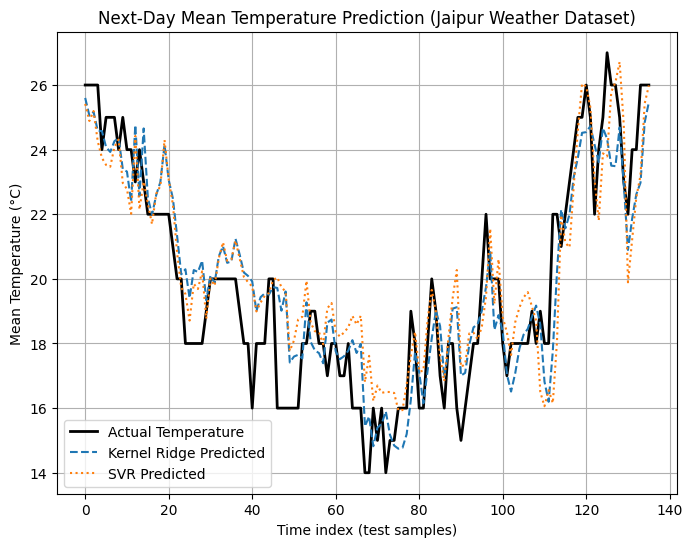

In [113]:


# --- Plot Predicted vs Actual for both models ---
plt.figure(figsize=(8,6))
plt.plot(y_test, label='Actual Temperature', color='black', linewidth=2)
plt.plot(y_pred_kr, label='Kernel Ridge Predicted', linestyle='--')
plt.plot(y_pred_svr, label='SVR Predicted', linestyle=':')
plt.title("Next-Day Mean Temperature Prediction (Jaipur Weather Dataset)")
plt.xlabel("Time index (test samples)")
plt.ylabel("Mean Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

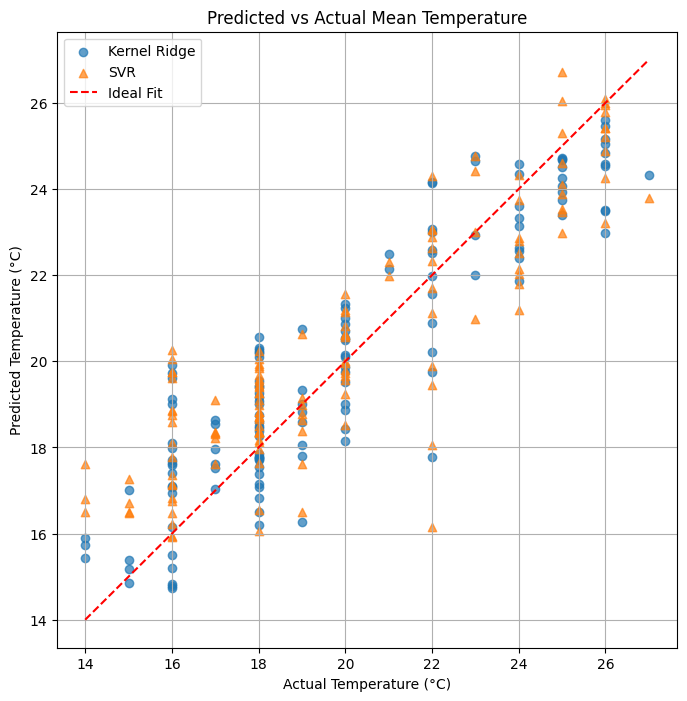

In [114]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_kr, alpha=0.7, label='Kernel Ridge', marker='o')
plt.scatter(y_test, y_pred_svr, alpha=0.7, label='SVR', marker='^')
max_val = max(max(y_test), max(y_pred_kr), max(y_pred_svr))
min_val = min(min(y_test), min(y_pred_kr), min(y_pred_svr))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Fit')
plt.title("Predicted vs Actual Mean Temperature")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


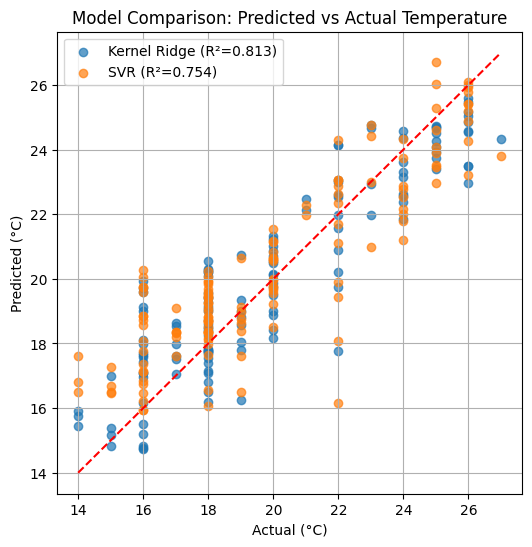

In [115]:
r2_kr = r2_score(y_test, y_pred_kr)
r2_svr = r2_score(y_test, y_pred_svr)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_kr, alpha=0.7, label=f'Kernel Ridge (R²={r2_kr:.3f})')
plt.scatter(y_test, y_pred_svr, alpha=0.7, label=f'SVR (R²={r2_svr:.3f})')
plt.plot([min_val, max_val], [min_val, max_val], 'r--')
plt.title("Model Comparison: Predicted vs Actual Temperature")
plt.xlabel("Actual (°C)")
plt.ylabel("Predicted (°C)")
plt.legend()
plt.grid(True)
plt.show()

In [116]:
joblib.dump(grid_svr.best_estimator_, "svr_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(kpca, "kpca.pkl")

['kpca.pkl']

In [117]:
model = joblib.load("svr_model.pkl")
scaler = joblib.load("scaler.pkl")
kpca = joblib.load("kpca.pkl")

In [118]:
new_data = np.array([[20, 1012, 85, 50, 35, 25, 22, 15, 1015, 1008, 0.2, 7, 15, 200]])  # Example
new_scaled = scaler.transform(new_data)
new_kpca = kpca.transform(new_scaled)
predicted_temp = model.predict(new_kpca)
print(f"Predicted next-day mean temperature: {predicted_temp[0]:.2f} °C")

Predicted next-day mean temperature: 27.77 °C
